# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# from config import api_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [3]:
# cities=cities[:5]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"?q={city}&units=Metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | pariaman
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | illizi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | al miqdadiyah
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | sidney
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | soio
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | opuwo
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portland,45.5234,-122.6762,29.73,44,20,3.09,US,1689117259
1,talnakh,69.4865,88.3972,4.56,96,100,5.65,RU,1689117281
2,pariaman,-0.6190,100.1200,24.82,89,82,1.91,ID,1689117447
3,ilulissat,69.2167,-51.1000,10.01,81,100,0.00,GL,1689117447
4,west island,-12.1568,96.8225,25.99,83,100,9.26,CC,1689117447


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,29.73,44,20,3.09,US,1689117259
1,talnakh,69.4865,88.3972,4.56,96,100,5.65,RU,1689117281
2,pariaman,-0.6190,100.1200,24.82,89,82,1.91,ID,1689117447
3,ilulissat,69.2167,-51.1000,10.01,81,100,0.00,GL,1689117447
4,west island,-12.1568,96.8225,25.99,83,100,9.26,CC,1689117447


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

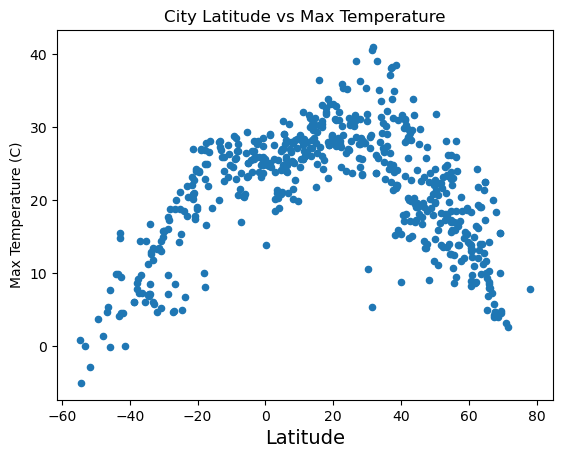

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = "Lat", y = "Max Temp")
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Max Temperature (C)')
plt.show() 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

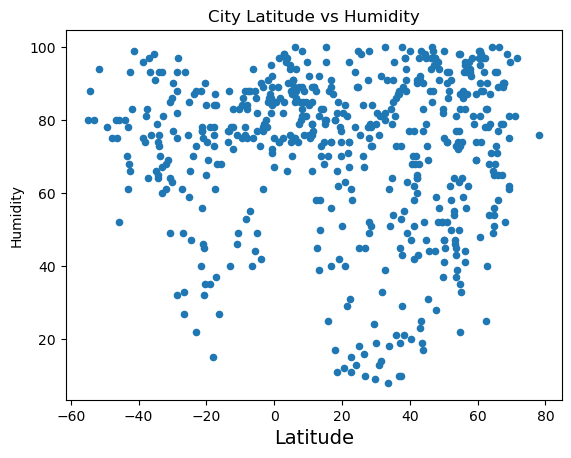

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = "Humidity")
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Humidity')
plt.show() 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

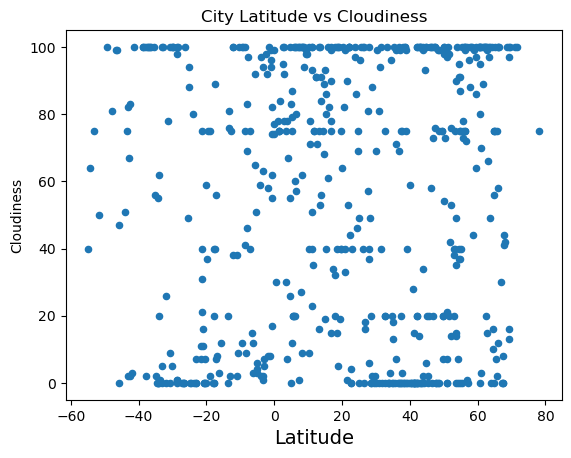

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Cloudiness')
plt.show() 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

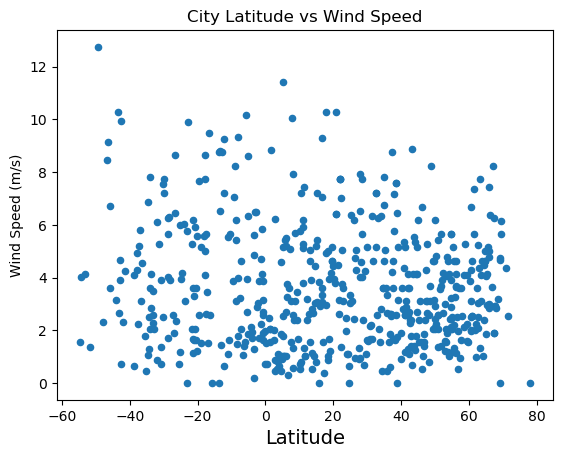

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = "Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Wind Speed (m/s)')
plt.show() 

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude < 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,29.73,44,20,3.09,US,1689117259
1,talnakh,69.4865,88.3972,4.56,96,100,5.65,RU,1689117281
3,ilulissat,69.2167,-51.1000,10.01,81,100,0.00,GL,1689117447
8,anadyr,64.7500,177.4833,17.28,51,0,5.00,RU,1689117448
9,illizi,26.4833,8.4667,30.89,16,0,4.75,DZ,1689117449


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,pariaman,-0.6190,100.1200,24.82,89,82,1.91,ID,1689117447
4,west island,-12.1568,96.8225,25.99,83,100,9.26,CC,1689117447
5,blackmans bay,-43.0167,147.3167,14.85,61,82,3.90,AU,1689117448
6,dunedin,-45.8742,170.5036,7.67,52,47,6.71,NZ,1689117250
7,port-aux-francais,-49.3500,70.2167,3.75,78,100,12.75,TF,1689117448


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and temperature is -0.64
Regression line equation is: y = -0.25 x + 31.71


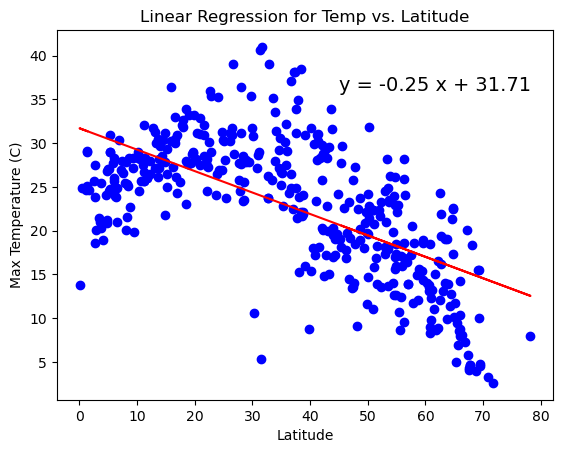

In [16]:
# Linear regression on Northern Hemisphere

correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
print(f"The correlation between latitude and temperature is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"Regression line equation is: {line_eq}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(45,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") 
plt.title("Linear Regression for Temp vs. Latitude")
plt.show()

The correlation between latitude and temperature is 0.86
Regression line equation is: y = 0.52 x + 28.85


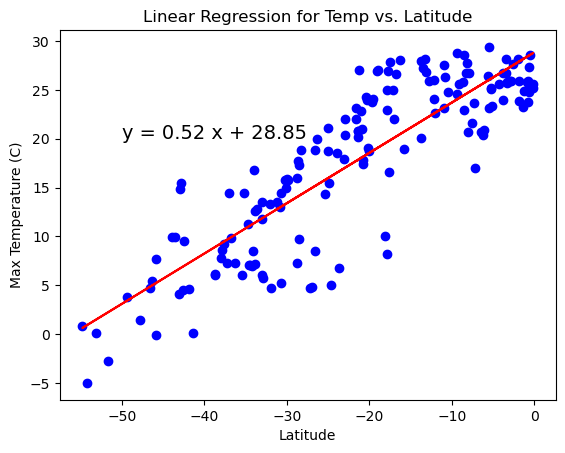

In [17]:
# Linear regression on Southern Hemisphere

correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
print(f"The correlation between latitude and temperature is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"Regression line equation is: {line_eq}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,20), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") 
plt.title("Linear Regression for Temp vs. Latitude")
plt.show()

**Discussion about the linear relationship:** The farther we move from the equator (Lat=0), the lower the temperature. The closer we move to the equator (Lat=0), the higher the temperature. This reveals a linear relationship wherein the temperature proportionally increases along the y-axis as we approach (0) along the x-axis.

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity is -0.04
Regression line equation is: y = -0.05 x + 73.03


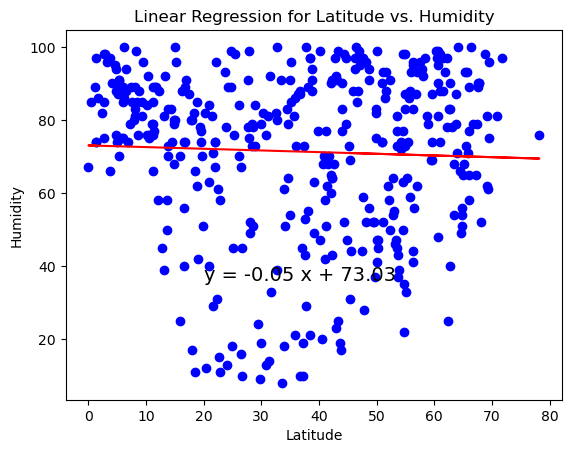

In [18]:
# Northern Hemisphere

correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
print(f"The correlation between latitude and humidity is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"Regression line equation is: {line_eq}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Linear Regression for Latitude vs. Humidity")
plt.show()

The correlation between latitude and humidity is -0.02
R-value: 0.00031352737813304486


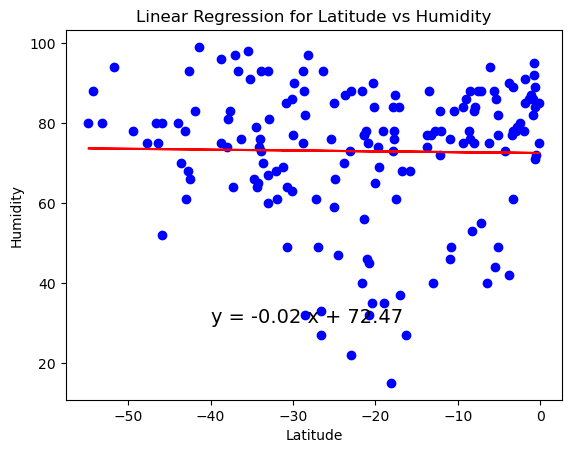

In [19]:
# Southern Hemisphere

correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
print(f"The correlation between latitude and humidity is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"R-value: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-40,30), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Linear Regression for Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** The higher we are above the equator, the lower the humidity. The lower we move below the equator, the higher the humdity. However, due to the nearly horizontal 180 degree angle of the slope, neither relationship is particularly strong.  

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness is -0.05
Regression line equation is: y = -0.1 x + 60.03


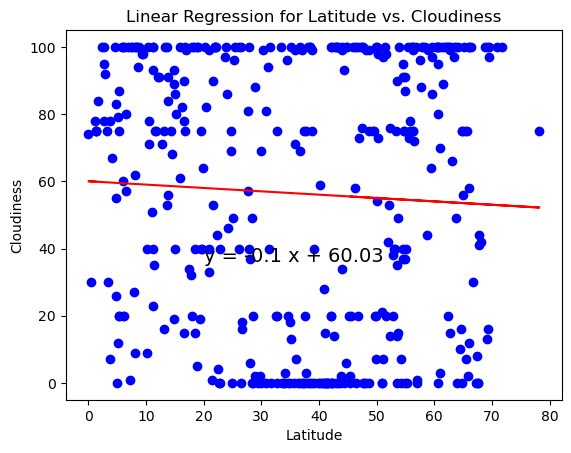

In [20]:
# Northern Hemisphere

correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
print(f"The correlation between latitude and cloudiness is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"Regression line equation is: {line_eq}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Linear Regression for Latitude vs. Cloudiness")
plt.show()

The correlation between latitude and cloudiness is -0.04
R-value: 0.0017698742406893797


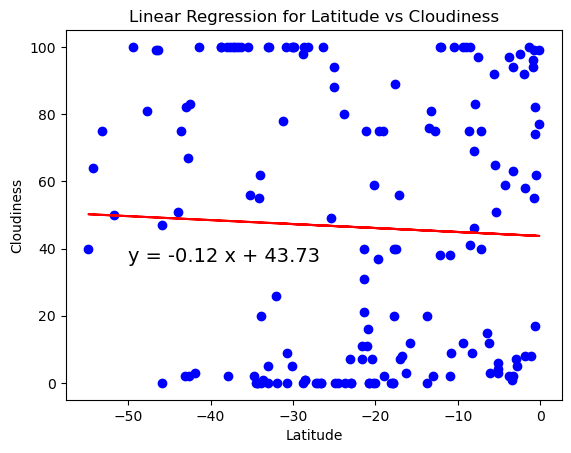

In [21]:
# Southern Hemisphere

correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
print(f"The correlation between latitude and cloudiness is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"R-value: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Linear Regression for Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** Cloudiness increases as we move below the equator and decreases as we rise above it. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed is 0.01
R-value: 0.0001064777689672105


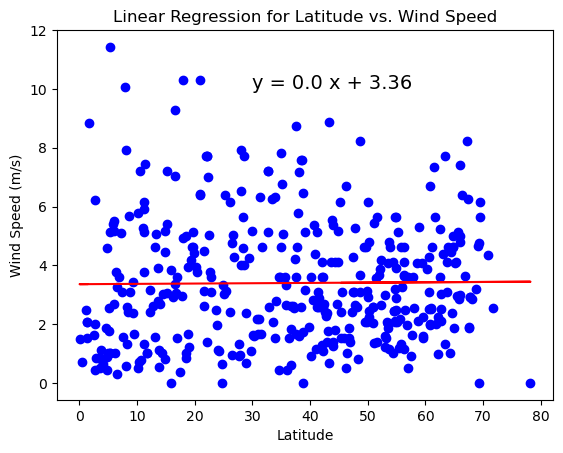

In [22]:
# Northern Hemisphere

correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
print(f"The correlation between latitude and wind speed is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"R-value: {rvalue**2}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(30,10), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)") 
plt.title("Linear Regression for Latitude vs. Wind Speed")
plt.show()

The correlation between latitude and wind speed is -0.08
R-value: 0.00602329786779346


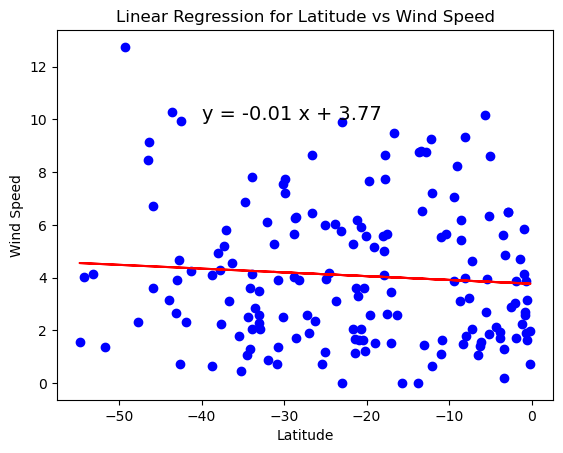

In [24]:
# Southern Hemisphere

correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
print(f"The correlation between latitude and wind speed is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"R-value: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],color='b')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-40,10), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Linear Regression for Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** Wind speed increases proportionally to movement below the equator or in the negative direction along the x-axis and flattens as we ascend above the equator, or move in the positive direction along the x-axis.  